# Logistic Regression

## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading in dataset

In [3]:
cvd = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Logistic_Model/CVDProjectData_1.csv')

## Exploratory Analysis

In [4]:
cvd.head(10)

,Census Tract,Total Population,California County,ZIP,Approximate Location,CES 4.0 Score,Pollution Burden Score,Asthma,Low Birth Weight,Cardiovascular Disease,...,Other/Multiple (%),Urban,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,LATractsVehicle_20,CVD Risk Level
0,6083000103,3433,Santa Barbara,93105,Unincorporated Santa Barbara County area,2.76,3.40,17.89,1.56,4.48,...,4.05,0,0,0,0,0,0,0,0,Mild
1,6083001500,2526,Santa Barbara,93108,Unincorporated Santa Barbara County area,2.46,2.48,11.87,0.00,5.76,...,0.99,1,0,0,0,0,0,0,0,Mild
2,6037262301,2748,Los Angeles,90049,Los Angeles,6.51,5.67,11.25,3.16,6.47,...,1.64,1,0,0,0,0,0,0,0,Mild
3,6073008501,5969,San Diego,92117,San Diego,5.22,4.21,22.74,2.49,6.19,...,5.98,1,0,0,0,0,0,0,0,Mild
4,6057001204,2273,Nevada,96161,Unincorporated Nevada County area,4.00,3.22,27.02,3.92,5.46,...,2.51,0,0,0,0,0,0,0,0,Mild
5,6061020105,1056,Placer,96140,Unincorporated Placer County area,2.91,2.18,12.21,NaN,5.64,...,3.41,0,0,0,0,0,0,0,0,Mild
6,6037464100,7121,Los Angeles,91108,San Marino,8.07,5.69,10.66,3.57,5.06,...,2.98,1,0,0,0,0,1,0,1,Mild
7,6073017106,4538,San Diego,92067,Rancho Santa Fe,6.40,4.47,9.75,3.77,5.77,...,1.98,1,0,0,0,0,0,0,0,Mild
8,6061020104,841,Placer,96145,Unincorporated Placer County area,4.21,2.85,15.89,NaN,6.44,...,3.33,0,0,0,0,0,0,0,0,Mild
9,6059042326,4781,Orange,92677,Laguna Niguel,5.23,3.32,19.29,3.48,9.11,...,9.60,1,0,0,0,0,0,0,0,Mild


In [5]:
cvd.tail(10)

,Census Tract,Total Population,California County,ZIP,Approximate Location,CES 4.0 Score,Pollution Burden Score,Asthma,Low Birth Weight,Cardiovascular Disease,...,Other/Multiple (%),Urban,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,LATractsVehicle_20,CVD Risk Level
8013,6075980200,312,San Francisco,94121,San Francisco,NaN,4.14,30.08,NaN,9.45,...,0.00,1,0,0,0,0,0,0,0,Mild
8014,6075980300,63,San Francisco,94122,San Francisco,NaN,4.75,16.73,NaN,4.65,...,0.00,1,0,0,0,0,0,0,0,Mild
8015,6079011400,3075,San Luis Obispo,93405,Unincorporated San Luis Obispo County area,NaN,3.85,17.70,NaN,5.92,...,4.72,1,0,0,0,0,0,0,0,Mild
8016,6083002604,2879,Santa Barbara,93436,Lompoc,NaN,4.85,47.20,NaN,15.10,...,2.15,1,0,0,0,0,0,0,0,High
8017,6083980000,0,Santa Barbara,93117,Santa Barbara,NaN,3.91,30.54,NaN,11.30,...,NaN,1,0,0,0,0,0,0,0,Moderate
8018,6085504417,269,Santa Clara,95035,Milpitas,NaN,1.73,22.39,NaN,8.40,...,0.00,0,0,0,0,0,0,0,0,Mild
8019,6095253000,6720,Solano,95687,Vacaville,NaN,3.65,77.03,NaN,15.20,...,2.80,1,0,0,0,0,0,0,0,High
8020,6095980000,0,Solano,94535,Fairfield,NaN,3.29,31.15,NaN,7.80,...,NaN,1,0,0,0,0,0,0,0,Mild
8021,6109985202,2509,Tuolumne,95327,Unincorporated Tuolumne County area,NaN,3.22,68.79,NaN,22.80,...,4.86,0,0,0,0,0,0,0,0,Very High
8022,6111980000,118,Ventura,61,Unincorporated Ventura County area,NaN,0.99,62.54,NaN,15.20,...,3.39,0,0,0,0,0,0,0,1,High


In [6]:
cvd.describe

<bound method NDFrame.describe of       Census Tract  Total Population California County    ZIP  \
0       6083000103              3433     Santa Barbara  93105   
1       6083001500              2526     Santa Barbara  93108   
2       6037262301              2748       Los Angeles  90049   
3       6073008501              5969         San Diego  92117   
4       6057001204              2273           Nevada   96161   
...            ...               ...               ...    ...   
8018    6085504417               269       Santa Clara  95035   
8019    6095253000              6720           Solano   95687   
8020    6095980000                 0           Solano   94535   
8021    6109985202              2509         Tuolumne   95327   
8022    6111980000               118          Ventura      61   

                          Approximate Location  CES 4.0 Score  \
0     Unincorporated Santa Barbara County area           2.76   
1     Unincorporated Santa Barbara County area         

In [7]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8023 entries, 0 to 8022
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Census Tract             8023 non-null   int64  
 1   Total Population         8023 non-null   int64  
 2   California County        8023 non-null   object 
 3   ZIP                      8023 non-null   int64  
 4   Approximate Location     8023 non-null   object 
 5   CES 4.0 Score            7931 non-null   float64
 6   Pollution Burden Score   8023 non-null   float64
 7   Asthma                   8023 non-null   float64
 8   Low Birth Weight         7807 non-null   float64
 9   Cardiovascular Disease   8023 non-null   float64
 10  Education                7931 non-null   float64
 11  Unemployment             7700 non-null   float64
 12  Housing Burden           7889 non-null   float64
 13  Pop. Char. Score         7931 non-null   float64
 14  PovertyRate             

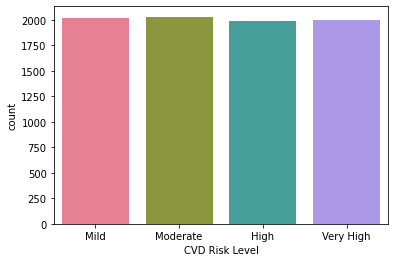

In [8]:
sns.countplot(x='CVD Risk Level', data=cvd, palette='husl')
plt.show()

In [9]:
cvd['CVD Risk Level'] = cvd['CVD Risk Level'].replace({'Very High': 'High'})#Combining Very High and High 

cvd['CVD Risk Level'] = cvd['CVD Risk Level'].replace({'Moderate': 'Mild'})#Combining Moderate and Mild

In [10]:
cvd['CVD Risk Level'] = cvd['CVD Risk Level'].replace({'High': 'At risk'})#Creating At risk group

cvd['CVD Risk Level'] = cvd['CVD Risk Level'].replace({'Mild': 'Mild risk'})#Creating Mild risk group

In [11]:
cvd['CVD Risk Level'].value_counts()

Mild risk    4041
At risk      3982
Name: CVD Risk Level, dtype: int64

In [12]:
cvd = pd.concat([cvd, pd.get_dummies(cvd['CVD Risk Level'])], axis=1)

In [13]:
cvd.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,CES 4.0 Score,Pollution Burden Score,Asthma,Low Birth Weight,Cardiovascular Disease,...,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,LATractsVehicle_20,CVD Risk Level,At risk,Mild risk
0,6083000103,3433,Santa Barbara,93105,Unincorporated Santa Barbara County area,2.76,3.40,17.89,1.56,4.48,...,0,0,0,0,0,0,0,Mild risk,0,1
1,6083001500,2526,Santa Barbara,93108,Unincorporated Santa Barbara County area,2.46,2.48,11.87,0.00,5.76,...,0,0,0,0,0,0,0,Mild risk,0,1
2,6037262301,2748,Los Angeles,90049,Los Angeles,6.51,5.67,11.25,3.16,6.47,...,0,0,0,0,0,0,0,Mild risk,0,1
3,6073008501,5969,San Diego,92117,San Diego,5.22,4.21,22.74,2.49,6.19,...,0,0,0,0,0,0,0,Mild risk,0,1
4,6057001204,2273,Nevada,96161,Unincorporated Nevada County area,4.00,3.22,27.02,3.92,5.46,...,0,0,0,0,0,0,0,Mild risk,0,1


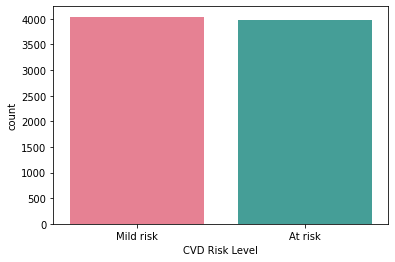

In [14]:
sns.countplot(x='CVD Risk Level', data=cvd, palette='husl')
plt.show()

## Feature Selection

In [15]:
x = cvd[['Pollution Burden Score','Asthma','Education','Housing Burden','PovertyRate','Unemployment','LowIncomeTracts']] #Here we are storing our independent variables
y = cvd['At risk']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1)#splitting between train and test setX

In [17]:
X_train.shape, X_test.shape

((5616, 7), (2407, 7))

In [18]:
X_train.dtypes

Pollution Burden Score    float64
Asthma                    float64
Education                 float64
Housing Burden            float64
PovertyRate               float64
Unemployment              float64
LowIncomeTracts             int64
dtype: object

In [19]:
X_test.dtypes

Pollution Burden Score    float64
Asthma                    float64
Education                 float64
Housing Burden            float64
PovertyRate               float64
Unemployment              float64
LowIncomeTracts             int64
dtype: object

In [20]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Pollution Burden Score',
 'Asthma',
 'Education',
 'Housing Burden',
 'PovertyRate',
 'Unemployment',
 'LowIncomeTracts']

In [21]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

Pollution Burden Score      0
Asthma                      0
Education                  61
Housing Burden             95
PovertyRate                 0
Unemployment              216
LowIncomeTracts             0
dtype: int64

In [22]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)  

In [23]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

Pollution Burden Score    0
Asthma                    0
Education                 0
Housing Burden            0
PovertyRate               0
Unemployment              0
LowIncomeTracts           0
dtype: int64

## Fitting Logistic Model

In [24]:
LR_model = LogisticRegression(penalty='l2',solver='liblinear',C=1,random_state=0)#Setting up the logistic model 
fit_model = LR_model.fit(X_train, y_train)#passing training and testing set through the model
y_pred = fit_model.predict(X_test)

In [25]:
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))  

Accuracy Score: 0.8005816368923971


## Feature Ranking

In [26]:
from matplotlib import pyplot

In [27]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': LR_model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

                Attribute  Importance
6         LowIncomeTracts    0.099992
5            Unemployment    0.075215
1                  Asthma    0.067139
2               Education    0.033171
4             PovertyRate   -0.004434
0  Pollution Burden Score   -0.010332
3          Housing Burden   -0.036625


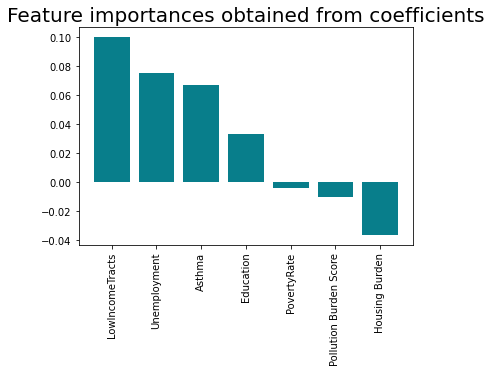

In [28]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Checking AUC, F1, And ROC Curve

In [29]:
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.8009382600444995

In [30]:
F1 = f1_score(y_test, y_pred)
F1

0.797979797979798

In [31]:
fpr, tpr, threshold = roc_curve(y_test, y_pred) #setting threshold for ROC curve
AUC_score = metrics.auc(fpr, tpr)

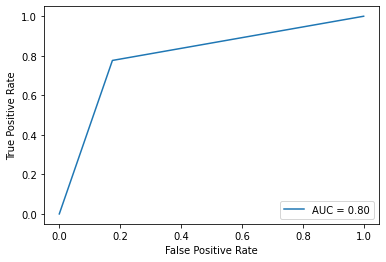

In [32]:
ROC_curve = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = auc_score)#Plotting ROC curve and we can see with a score of 0.80 it looks good
ROC_curve.plot()
plt.show()

The model will be able to distinguish patients that are At Risk roughly 80% of the time!

## Confusion Matrix

In [33]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[979 207]
 [273 948]]

True Positives(TP) =  979

True Negatives(TN) =  948

False Positives(FP) =  207

False Negatives(FN) =  273


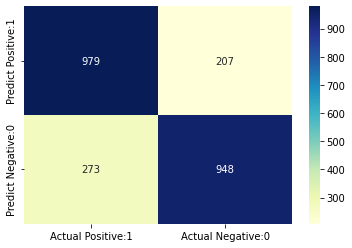

In [34]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

We can see from the confusion matrix that our logistic model accurately predicted 979 individuals as "At Risk" for CVD, 948 for "Mild Risk". On the other hand we can see that the logistic model also falsely categorized 207 individuals as "At Risk" and 273 as "Mild Risk". 

## Classification Report

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1186
           1       0.82      0.78      0.80      1221

    accuracy                           0.80      2407
   macro avg       0.80      0.80      0.80      2407
weighted avg       0.80      0.80      0.80      2407



## Specificity and Sensitivity 

In [36]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [37]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8006


In [38]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1994


In [39]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8255


The ratio of true positives to the sum of true positives and false positives, precision, is roughly 82.5% is quite good. 

In [40]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7819


The ratio of true positives to the sum of true positives and false negatives, sensitivity, is roughly 78.2%

In [41]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7819


In [42]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1792


In [43]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8208


The ratio of true negatives to the sum of true negatives and false positives, specificity is roughly 82.1%

## Predicted Probabilities 

In [44]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = fit_model.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.48410025, 0.51589975],
       [0.83243707, 0.16756293],
       [0.57956954, 0.42043046],
       [0.47558644, 0.52441356],
       [0.76776365, 0.23223635],
       [0.52379869, 0.47620131],
       [0.09200997, 0.90799003],
       [0.72727289, 0.27272711],
       [0.09033224, 0.90966776],
       [0.0745816 , 0.9254184 ]])

In [45]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Mild Risk of CVD (0)', 'Prob of - At Risk of CVD (1)'])

y_pred_prob_df

,Prob of - Mild Risk of CVD (0),Prob of - At Risk of CVD (1)
0,0.484100,0.515900
1,0.832437,0.167563
2,0.579570,0.420430
3,0.475586,0.524414
4,0.767764,0.232236
5,0.523799,0.476201
6,0.092010,0.907990
7,0.727273,0.272727
8,0.090332,0.909668
9,0.074582,0.925418


In [46]:
# print the first 10 predicted probabilities for class 1 - Probability of At Risk of CVD

fit_model.predict_proba(X_test)[0:10, 1]

array([0.51589975, 0.16756293, 0.42043046, 0.52441356, 0.23223635,
       0.47620131, 0.90799003, 0.27272711, 0.90966776, 0.9254184 ])

In [47]:
# store the predicted probabilities for class 1 - Probability of At Risk of CVD

y_pred1 = fit_model.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

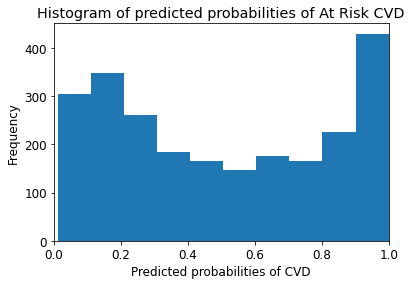

In [48]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of At Risk CVD')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of CVD')
plt.ylabel('Frequency')

## K-fold Cross Validation

In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(fit_model, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79092527 0.80676759 0.78628673 0.79252004 0.80676759]


In [66]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7967
